# Importing the required Libraries

In [1]:
#print many statements at same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import collections
import warnings
import pandas_profiling
import numpy as np
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline
import graphviz


# Reading the CSV file from the machine

In [3]:
wine= pd.read_csv("D:\Module3_RP\Session1\winequality-white.csv", sep=';')

# Exploratory Data Analysis of the given data:

In [4]:
wine.describe(include = 'all')
wine.head(5)
wine.shape
wine.columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(4898, 12)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Rename Columns names to remove spaces

In [5]:
wine.columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

Once again exploring the data

In [6]:
wine.info()
wine.head()
wine.shape
wine.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(4898, 12)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Understand the distribution of the Wine Quality

In [7]:
wine.groupby('quality').size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

# Create Categorical Bins(Binning) for the Wine Quality

To avoid the misclassification of the categories which has less sample size

In [8]:
bins=(2,5,6,9)
names=[1,2,3]
wine['quality_type']=pd.cut(wine['quality'],bins=bins,labels=names)

In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
quality_type            4898 non-null category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB


In [17]:
wine.groupby('quality_type').size()

quality_type
1    1640
2    2198
3    1060
dtype: int64

# Convert pandas column type from Categorical to Numerical

In [9]:
wine['quality_type']=pd.to_numeric(wine['quality_type'])

In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
quality_type            4898 non-null int64
dtypes: float64(11), int64(2)
memory usage: 497.5 KB


# Generate Pandas Profiling Report

In [11]:
eda_report = pandas_profiling.ProfileReport(wine)
eda_report.to_file("wineClassification_eda.html")

# Creating Features and Labels

Lables/Dependent Variable: QUALITY_TYPE

Features/Independent Variables: All Columns otherthan Quality and Quality Type

In [12]:
x=wine.drop(['quality','quality_type'],axis=1,inplace=False) #
y=wine['quality_type']           

In [13]:
x.shape
y.shape

(4898, 11)

(4898,)

In [14]:
x.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [27]:
y

0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      1
11      1
12      1
13      3
14      1
15      3
16      2
17      3
18      2
19      1
20      3
21      3
22      3
23      1
24      2
25      2
26      2
27      2
28      2
29      3
       ..
4868    2
4869    2
4870    3
4871    2
4872    1
4873    2
4874    2
4875    2
4876    3
4877    1
4878    1
4879    2
4880    2
4881    2
4882    1
4883    2
4884    1
4885    2
4886    3
4887    3
4888    1
4889    2
4890    2
4891    2
4892    1
4893    2
4894    1
4895    2
4896    3
4897    2
Name: quality_type, Length: 4898, dtype: int64

# Split Train and Test Data

Train Data=75% Test Data=25%

In [15]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=1)
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(3428, 11)

(3428,)

(1470, 11)

(1470,)

#   Building Random Forest: Set Hyper Parameters First

In [16]:
n_estimators=[10,500,1000,2000]
criterion=['gini','entropy']
min_samples_split=[2,10,20,50,100]
max_depth=[20,30,40,50,None]

# Model Fitting using Randomized Search and Cross-Validation

In [21]:
param_grid={'n_estimators':n_estimators,
             'criterion':criterion,'min_samples_split':min_samples_split,'max_depth':max_depth}


In [22]:
rf=RandomForestClassifier()



In [23]:
rf_g=RandomizedSearchCV(rf,param_grid,cv=5,verbose=2,n_jobs=-1)


In [24]:
rf_g.fit(train_x,train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   55.4s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10, 500, 1000, 2000], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 20, 50, 100], 'max_depth': [20, 30, 40, 50, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

# Find out the best setting Parameters

In [25]:
rf_g.best_score_

0.6875729288214703

# Out of 10 models built, the best moel is at the below index location

In [26]:
rf_g.best_index_

8

# Visualizing all the 10 models

In [28]:
cv=pd.DataFrame(rf_g.cv_results_)
cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.159263,0.059914,0.595210,0.015353,2000,2,40,gini,"{'n_estimators': 2000, 'min_samples_split': 2,...",0.716157,...,0.686698,0.015465,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,2.920789,0.014309,0.117486,0.004478,500,20,None,gini,"{'n_estimators': 500, 'min_samples_split': 20,...",0.694323,...,0.658985,0.019648,4,0.879606,0.876732,0.878556,0.870580,0.879738,0.877042,0.003406
2,10.928178,0.429216,0.486498,0.018556,2000,50,None,gini,"{'n_estimators': 2000, 'min_samples_split': 50...",0.668122,...,0.632439,0.019014,7,0.755199,0.759300,0.758935,0.758294,0.759475,0.758241,0.001574
3,3.459947,0.031780,0.134840,0.002309,500,20,20,gini,"{'n_estimators': 500, 'min_samples_split': 20,...",0.688501,...,0.658110,0.015653,5,0.875593,0.879650,0.881473,0.874225,0.877915,0.877771,0.002630
4,17.275403,0.162129,0.603986,0.016151,2000,2,50,gini,"{'n_estimators': 2000, 'min_samples_split': 2,...",0.721980,...,0.686989,0.018096,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,6.289980,0.089730,0.222605,0.006687,1000,100,20,entropy,"{'n_estimators': 1000, 'min_samples_split': 10...",0.646288,...,0.611144,0.018894,9,0.671653,0.677608,0.675055,0.680277,0.680394,0.676997,0.003317
6,0.056453,0.006198,0.004385,0.000486,10,100,30,gini,"{'n_estimators': 10, 'min_samples_split': 100,...",0.652111,...,0.604142,0.027457,10,0.675666,0.683443,0.668490,0.686110,0.675292,0.677800,0.006300
7,0.085970,0.008613,0.005186,0.000398,10,10,None,gini,"{'n_estimators': 10, 'min_samples_split': 10, ...",0.657933,...,0.637398,0.012385,6,0.919737,0.918308,0.915026,0.912140,0.920918,0.917226,0.003219
8,10.686446,0.758963,0.202665,0.039310,1000,2,40,entropy,"{'n_estimators': 1000, 'min_samples_split': 2,...",0.726346,...,0.687573,0.021470,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,2.289078,0.081792,0.112500,0.003117,500,100,None,gini,"{'n_estimators': 500, 'min_samples_split': 100...",0.647744,...,0.612019,0.018763,8,0.686976,0.687454,0.689643,0.687933,0.688047,0.688010,0.000900


# Make Prediction Using the Best Model

In [29]:
predicted=rf_g.predict(test_x)

# Model Performance Evaluation

In [30]:
metrics.accuracy_score(predicted,test_y)

0.7047619047619048

In [31]:
print(metrics.classification_report(predicted,test_y))

              precision    recall  f1-score   support

           1       0.69      0.76      0.72       433
           2       0.76      0.65      0.70       767
           3       0.62      0.76      0.68       270

   micro avg       0.70      0.70      0.70      1470
   macro avg       0.69      0.73      0.70      1470
weighted avg       0.71      0.70      0.70      1470



Confusion Matrix


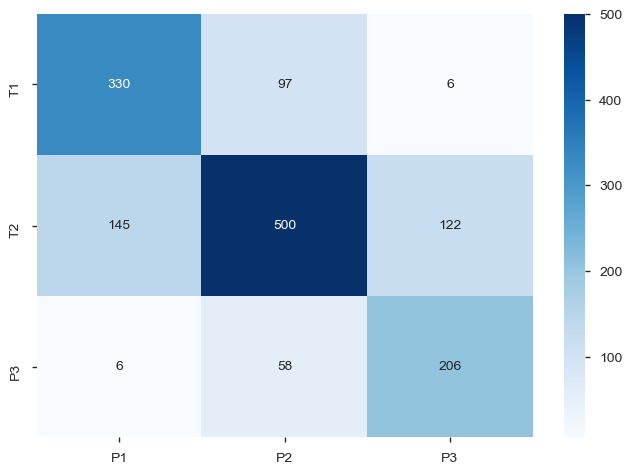

In [32]:
#Confusion matrix
print('Confusion Matrix')
cf=metrics.confusion_matrix(predicted,test_y)
lbl1=["P1","P2","P3"]
lbl2=["T1","T2","P3"]
sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

# KNN Model 

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
clf_knn=KNeighborsClassifier(n_neighbors=3)

In [63]:
clf_knn=clf_knn.fit(train_x,train_y)

In [64]:
predicted=clf_knn.predict(test_x)

In [65]:
metrics.accuracy_score(predicted,test_y)

0.5333333333333333

In [66]:
print(metrics.classification_report(predicted,test_y))

              precision    recall  f1-score   support

           1       0.56      0.49      0.52       558
           2       0.57      0.56      0.57       661
           3       0.42      0.56      0.48       251

   micro avg       0.53      0.53      0.53      1470
   macro avg       0.52      0.54      0.52      1470
weighted avg       0.54      0.53      0.53      1470



# KNN Model using For Loop

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [55]:
list_k=[3,5,7,9,11,13,5,20]

In [56]:
for k in list_k:
    clf_knn=KNeighborsClassifier(n_neighbors=k)
    score_knn=cross_val_score(clf_knn,test_x,test_y,cv=5)
    print("K:",k)
    print("Cross Validation Score:" + str(score_knn))
    print("Cross Validation Mean Score:" + str(score_knn.mean()))
    print("")
    

K: 3
Cross Validation Score:[0.44067797 0.48979592 0.5        0.46258503 0.46757679]
Cross Validation Mean Score:0.4721271420583042

K: 5
Cross Validation Score:[0.44745763 0.47619048 0.46258503 0.45918367 0.47440273]
Cross Validation Mean Score:0.46396390823350797

K: 7
Cross Validation Score:[0.45423729 0.47278912 0.48979592 0.47619048 0.46757679]
Cross Validation Mean Score:0.47211791802970976

K: 9
Cross Validation Score:[0.47457627 0.43877551 0.49659864 0.43877551 0.44709898]
Cross Validation Mean Score:0.45916498143192025

K: 11
Cross Validation Score:[0.45084746 0.43877551 0.45578231 0.42857143 0.44709898]
Cross Validation Mean Score:0.44421513708740273

K: 13
Cross Validation Score:[0.46101695 0.44557823 0.4829932  0.44557823 0.47440273]
Cross Validation Mean Score:0.46191386787838296

K: 5
Cross Validation Score:[0.44745763 0.47619048 0.46258503 0.45918367 0.47440273]
Cross Validation Mean Score:0.46396390823350797

K: 20
Cross Validation Score:[0.49152542 0.45918367 0.4693877